### Identificación de gastos recurrentes

In [2]:
import pandas as pd
# Cargar datasets
df_clientes = pd.read_csv("datos/base_clientes_final.csv")
df_trans = pd.read_csv("datos/base_transacciones_final.csv")

# Convertir fechas a datetime
df_trans["fecha"] = pd.to_datetime(df_trans["fecha"])
df_clientes["fecha_nacimiento"] = pd.to_datetime(df_clientes["fecha_nacimiento"])
df_clientes["fecha_alta"] = pd.to_datetime(df_clientes["fecha_alta"])

# Unir datos
df = df_trans.merge(df_clientes, on="id", how="left")


In [4]:
df.sort_values(by=["id", "comercio", "fecha"], inplace=True)

df["dias_entre"] = df.groupby(["id", "comercio"])["fecha"].diff().dt.days
df["dias_entre"] = df["dias_entre"].fillna(0)

agg_df = df.groupby(["id", "comercio"]).agg({
    "dias_entre": ["mean", "std", "count"],
    "monto": ["mean", "std"]
}).reset_index()

agg_df.columns = ["id", "comercio", "dias_mean", "dias_std", "n_transacciones", "monto_mean", "monto_std"]
print(agg_df)

                                             id         comercio   dias_mean  \
0      003d9abe467a91847d566cf455bd2d7d6c8f7e75           AMAZON    9.380952   
1      003d9abe467a91847d566cf455bd2d7d6c8f7e75     AMAZON PRIME   26.071429   
2      003d9abe467a91847d566cf455bd2d7d6c8f7e75  CASHI ECOMMERCE    0.000000   
3      003d9abe467a91847d566cf455bd2d7d6c8f7e75        CINEPOLIS   33.500000   
4      003d9abe467a91847d566cf455bd2d7d6c8f7e75             DIDI    2.213333   
...                                         ...              ...         ...   
22293  ff67da037fae796809be0e36fb9cdd0e191c38a4        SAMS CLUB  125.000000   
22294  ff67da037fae796809be0e36fb9cdd0e191c38a4        STARBUCKS   22.000000   
22295  ff67da037fae796809be0e36fb9cdd0e191c38a4        TOTALPLAY    0.000000   
22296  ff67da037fae796809be0e36fb9cdd0e191c38a4             UBER    6.521739   
22297  ff67da037fae796809be0e36fb9cdd0e191c38a4        UBER EATS   42.142857   

         dias_std  n_transacciones  mon

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Escalar variables
X = agg_df[["dias_mean", "monto_mean", "dias_std", "monto_std"]].fillna(0)
X_scaled = StandardScaler().fit_transform(X)

# DBSCAN
db = DBSCAN(eps=0.5, min_samples=3).fit(X_scaled)
agg_df["cluster_dbscan"] = db.labels_
 
print(db)

DBSCAN(min_samples=3)


In [11]:
agg_df.groupby("cluster_dbscan")[["dias_mean", "dias_std", "monto_mean", "monto_std", "n_transacciones"]].describe()


dias_mean                                                 \
                   count        mean        std         min         25%   
cluster_dbscan                                                            
-1                 360.0   57.024890  41.254049    0.000000   25.000000   
 0               21833.0   22.015297  25.143644    0.000000    2.500000   
 1                   3.0    0.000000   0.000000    0.000000    0.000000   
 2                   5.0    0.000000   0.000000    0.000000    0.000000   
 3                   4.0   71.037500   3.461304   66.750000   69.000000   
 4                   3.0  131.666667   3.752777  128.000000  129.750000   
 5                   3.0   18.007645   1.324198   16.823529   17.292717   
 6                   3.0  181.666667   0.763763  181.000000  181.250000   
 7                   7.0    6.978571   6.585588    0.000000    1.375000   
 8                   4.0   37.675000   3.330040   34.000000   36.025000   
 9                   3.0   10.392157   0.533751   10.000000   10.088235   
 10                  3.0   27.449883   0.679882   26.727273   27.136364   
 11                  4.0    8.917147   3.310015    4.375000    8.031250   
 12                  3.0   63.750000   4.380354   59.250000   61.625000   
 13                  3.0   31.169841   5.086945   25.666667   28.904762   
 14                  3.0    0.166667   0.288675    0.000000    0.000000   
 15                  4.0   13.820891   3.074767   11.468750   12.228299   
 16                  3.0  122.500000   3.968627  118.000000  121.000000   
 17                  4.0  120.791667   3.937886  116.000000  119.000000   
 18                 11.0   30.091726   5.585025   22.166667   26.287500   
 19                  3.0   23.866667   5.852635   20.000000   20.500000   
 20                  3.0   10.641473   4.462914    7.500000    8.087209   
 21                  4.0  152.500000   4.082483  149.500000  150.250000   
 22                  3.0   41.333333   3.511885   38.000000   39.500000   
 23                  3.0   71.261111   4.342181   68.333333   68.766667   
 24                  3.0   10.447734   4.655627    6.062500    8.004934   
 25                  3.0    0.000000   0.000000    0.000000    0.000000   
 26                  4.0   22.962500   2.814657   19.100000   21.837500   
 27                  3.0   36.788360   6.706388   29.222222   34.182540   
 28                  3.0   88.111111   2.110380   86.500000   86.916667   

                                                   dias_std              ...  \
                       50%         75%         max    count        mean  ...   
cluster_dbscan                                                           ...   
-1               48.000000   81.333333  191.500000    354.0   76.456817  ...   
 0               16.176471   28.666667  190.000000  17514.0   32.033610  ...   
 1                0.000000    0.000000    0.000000      3.0    0.000000  ...   
 2                0.000000    0.000000    0.000000      2.0    0.000000  ...   
 3               71.575000   73.612500   74.250000      4.0  141.936377  ...   
 4              131.500000  133.500000  135.500000      3.0  186.204786  ...   
 5               17.761905   18.599702   19.437500      3.0   15.693505  ...   
 6              181.500000  182.000000  182.500000      3.0  256.915464  ...   
 7                5.683333   12.175000   16.066667      7.0    9.854187  ...   
 8               37.350000   39.000000   42.000000      4.0   47.767062  ...   
 9               10.176471   10.588235   11.000000      3.0   13.272197  ...   
 10              27.545455   27.811189   28.076923      3.0   10.953112  ...   
 11               9.496795   10.382692   12.300000      4.0   12.898992  ...   
 12              64.000000   66.000000   68.000000      3.0   93.375872  ...   
 13              32.142857   33.921429   35.700000      3.0   34.593792  ...   
 14               0.000000    0.250000    0.500000      1.0    0.707107  ...   
 15              12

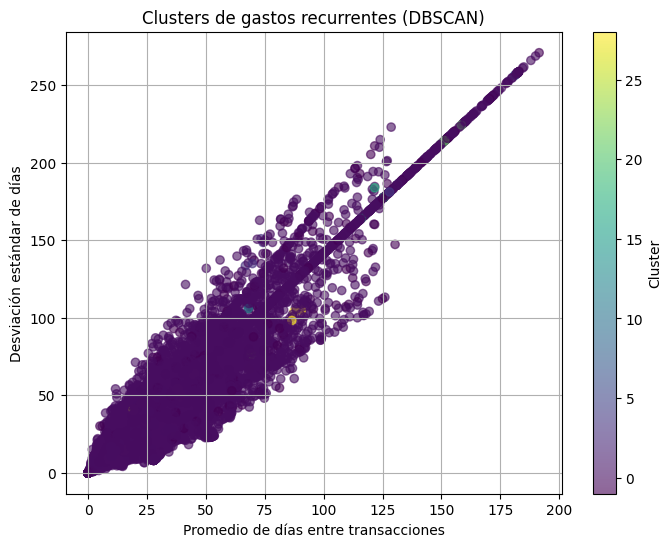

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(agg_df["dias_mean"], agg_df["dias_std"], c=agg_df["cluster_dbscan"], cmap="viridis", alpha=0.6)
plt.xlabel("Promedio de días entre transacciones")
plt.ylabel("Desviación estándar de días")
plt.title("Clusters de gastos recurrentes (DBSCAN)")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()
